# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [20]:
%pip install matplotlib

     |████████████████████████████████| 7.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/heziqi/Documents/code/2023/amse-project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to the SQLite database using SQLAlchemy
engine = create_engine('sqlite:///data.sqlite')

df = pd.read_sql_table('trip_count_matrix_country_by_age_activity', con=engine)


### Look at the first rows

In [2]:
df.head(10)

,start_county,end_county,age_group,activity_dest,trip_cnt
0,5374,7143,4,4,65
1,9182,9190,4,4,35
2,9679,9571,3,4,43
3,10044,7235,2,2,55
4,10045,8216,4,6,1
5,8416,8316,4,4,25
6,7337,7337,5,6,20
7,16062,16062,5,5,2535
8,12060,12072,2,3,36
9,8221,8225,2,7,269


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [3]:
df.info()

df['start_county'].nunique()

df['end_county'].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305995 entries, 0 to 305994
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   start_county   305995 non-null  int64
 1   end_county     305995 non-null  int64
 2   age_group      305995 non-null  int64
 3   activity_dest  305995 non-null  int64
 4   trip_cnt       305995 non-null  int64
dtypes: int64(5)
memory usage: 11.7 MB


400

### Data Understanding
Clean the data and gain a better understanding of its structure.

In [6]:
# Check the summary statistics of the dataset
df.describe()

,start_county,end_county,age_group,activity_dest,trip_cnt
count,305995.000000,305995.000000,305995.000000,305995.000000,3.059950e+05
mean,8043.853824,8057.188225,2.797441,4.376585,8.294190e+02
std,3299.918009,3323.263528,1.270009,1.977137,7.446166e+03
min,1001.000000,1001.000000,1.000000,1.000000,1.000000e+00
25%,5911.000000,5911.000000,2.000000,3.000000,5.000000e+00
50%,8125.000000,8125.000000,3.000000,4.000000,2.000000e+01
75%,9561.000000,9561.000000,4.000000,6.000000,1.110000e+02
max,16077.000000,16077.000000,5.000000,7.000000,1.416436e+06


In [7]:
# Check the data types of each column
df.dtypes

start_county     int64
end_county       int64
age_group        int64
activity_dest    int64
trip_cnt         int64
dtype: object

In [8]:
# Check for missing values
df.isnull().sum()

start_county     0
end_county       0
age_group        0
activity_dest    0
trip_cnt         0
dtype: int64

There is no missing values, great!

In [9]:
# Check for duplicates
df.duplicated().sum()

0

Unique values in each column.

In [12]:
# Explore unique values in categorical columns
df['age_group'].unique()

array([4, 3, 2, 5, 1])

In [13]:
df['activity_dest'].unique()

array([4, 2, 6, 5, 3, 7, 1])

In [17]:
df['start_county'].nunique()

400

In [18]:
df['trip_cnt'].nunique()

12133

#### Visualization

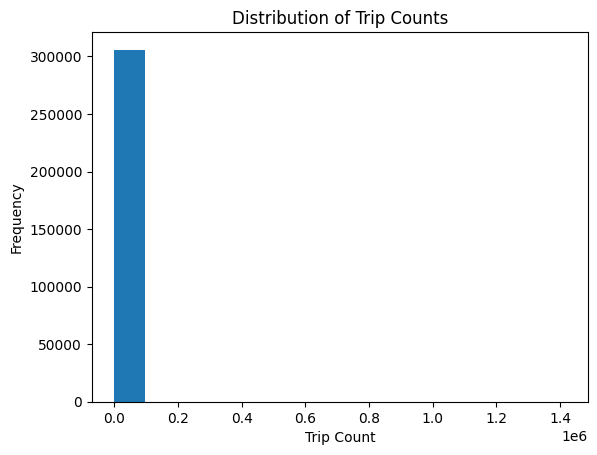

In [22]:
# Visualize distributions using histograms or other plots
import matplotlib.pyplot as plt

plt.hist(df['trip_cnt'], bins=10)
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Counts')
plt.show()

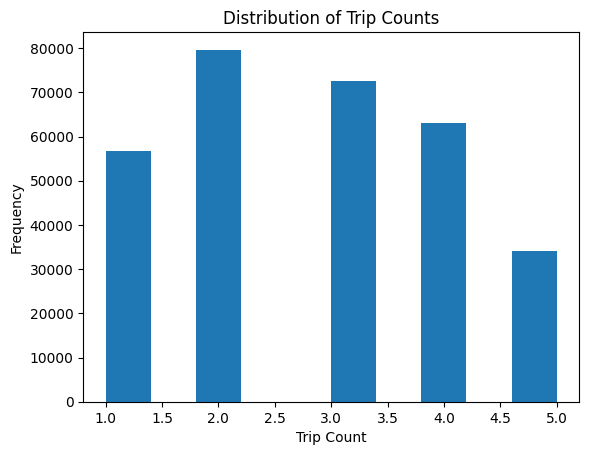

In [25]:
plt.hist(df['age_group'], bins=10)
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Counts')
plt.show()

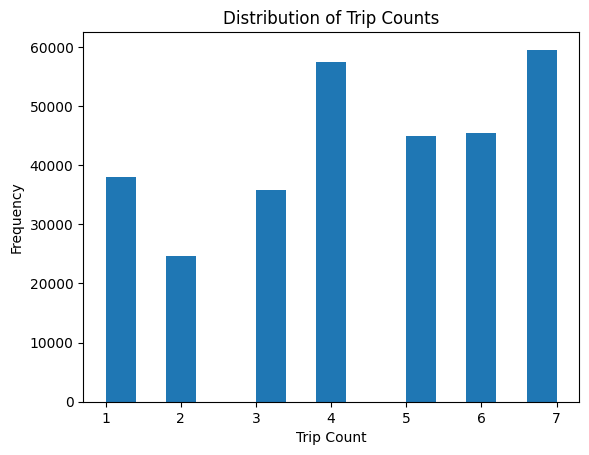

In [29]:
plt.hist(df['activity_dest'], bins=15)
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Counts')
plt.show()

In [ ]:
# Explore traffic flows using start_county and end_county columns
traffic_flows = df.groupby(['start_county', 'end_county']).sum('trip_cnt')
print(traffic_flows)

# Generate a correlation matrix to identify relationships between variables
correlation_matrix = df.corr()
print(correlation_matrix)